In [1]:
import cv2
import time
import mediapipe as mp
from IPython.display import clear_output
import matplotlib.pyplot as plt


In [2]:
# Initialize MediaPipe Hands and Drawing utilities
mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils
hands = mp_hands.Hands()

# Initialize video capture (0 for default webcam)
cap = cv2.VideoCapture(0)


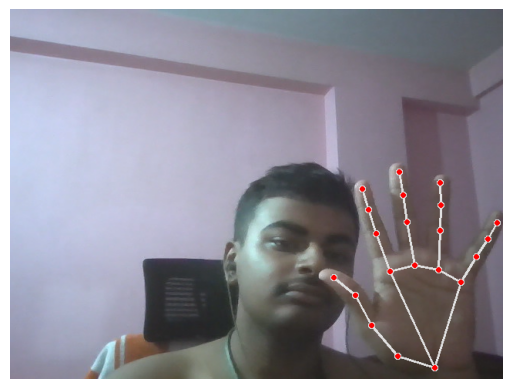

In [3]:
max_frames = 30  # Change this to process more/less frames
frame_count = 0

try:
    while cap.isOpened() and frame_count < max_frames:
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            break

        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        result = hands.process(img_rgb)

        if result.multi_hand_landmarks:
            for handLms in result.multi_hand_landmarks:
                mp_draw.draw_landmarks(image, handLms, mp_hands.HAND_CONNECTIONS)

        # Convert image to RGB for display
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Clear the output and display the image
        clear_output(wait=True)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        time.sleep(0.1)
        frame_count += 1
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    cap.release()
    cv2.destroyAllWindows()


In [4]:
# Release resources if not already done
cap.release()
cv2.destroyAllWindows()
